In [ ]:
## 회귀방법
+ 모수적 방법 : 선형기반 LinearRegression, SVM(SVR)
+ 비모수적 방법 : knn
+ 기타 : 회귀트리 (CART 기반)

In [ ]:
## 1. 선형기반 : LinearRegression(회귀)   : 수치예측
    - 모집단의 표본의 회귀일차함수의 최적의 가중치와 절편을 찾는 과정으로  
    - 잔차(표본의 회귀일차함수식과 표본데이터의 차이, 모집단의 오차에 적용)을 줄여가는 과정(RSS)
    - RSS에 사용되는 비용오차함수(MSE, RMSE) 
    + 비용오차함수(MSE) 최적의 가중치(w)와 절편(b)을 찾는 과정  
      : 편미분을 이용한 경사하강법(GD(Gradient Decent, learning_rate),
                        확률적경사하강법(SGD, 미니배치,loss함수로 'perceptron' 'log' SVM'hinge')
                        cf) 결정트리기반 약한분류기 가중치 부스팅방식에 경사하강법도입: GBM(Gradient Boosting Machine)
        편미분을 이용한 경사하강법 (RSS에 변수(가중치, 절편) 편미분 ==> 0되는 조건으로 일차연립방정식을 풀면, 가중치와 절편나옴)
    + 성능지표 : statsmodel (모델의 전체 결정계수, 개별 독립변수 귀무가설 기각(p value), 모델의 타당성 검토)
        - R^2  총편차 = 회귀변동(알수 있음) + 오차(잔차)변동(알수 없음)
               총편차로 나누면
               회귀변동/총편차 = R^2 = 1- 오차(잔차)변동/총편차   > 0.7이상 적정
    + 편향 - 분산 트레이트 오프(bias - variance trade off) : 사격 영점조절 탄착군 형성
    + 비용오차함수 최소화하는 W가중치를 찾기 위해  
         - 릿지모델(Ridge, L2규제 : 가중치 최소화), 라쏘모델(Lasso, L1규제 : 가중치항목 삭제 ) 
* 잔차 4요건 : statsmodel 회귀모델의 타당성 검토항목   
                        <=== 이 요건을 위해 독립변수와 종속변수의 상관관계 확인, 정규성(전처리, 이상치 제거)
    + 선형성(Lineearity)
    + 독립성Independence (This is probably more serious for time series. I’ll pass it for now)  : DW
    + 정규성 (Normality) 
    + 등분산성 (Equal variance (or homoscedasticity)) : F score
* 회귀 성능지표 : 수치예측에서의 차이
    + R^2() 결정계수 :  회귀변동/총변동 = 1 - 잔차변동/총변동  == 전체 회귀모델의 평가항목(설명력)
    + MSE (오차함수로도 사용)
    + RMSE (오차함수로도 사용)  
    + RMSEL
    + MAE 

### 1-1회귀분석의 모든 내용 : https://m.blog.naver.com/jhkang8420/221291682151

In [ ]:
### 1-2 statsmodel에 대한 해석
#### 전체 모형에 대한 해석
* R-squred, Adj.R-squred : 보통 설명력, 주어진 데이터를 현재 모형이 얼마나 잘 설명하고 있는지를 나타내는 지수    
단 R-squared는 독립변수가 추가될 수 록 증가하는 값이라 다중회귀에서는 Adj.R-squared 값을 본다.  
0 ~ 1 값 1에 가까우면 모델이 데이터에 잘 맞음  
    + 회귀모델 성능평가지표 : R^2(분산기반=예측값var/실제값var), MAE, MSE, RMSE     cf) 손실비용(loss, cost)함수 : MSE, RMSE  
    + 분류모델 성능평가지표 :
        - 이진 confusion matrix , accuracy, precision, recall ==> F1 score  ==> ROC 커브, AUC
        - 다항 confusion matrix , accuracy

* Prob(F-statistics) : 다중회귀에서 추가: 모형 전체 등분산성 검정  p-value 로 통상 0.05이하인 경우 유의 [ cf) t 검정통계량 : 개개 독립변수]  
    절편이외의 회귀계수에 관하여 조건부여(b1=b2===0), 분산분석(ANOVA)   
* likelihood : 우도 : 어떤 관측값을 얻을 확률(곱으로) 0 ~ 1 : 최대 우도 = 최소 오차 
* Log likelihood : 로그 최대우도 : 로그값이으로 - 마이너스 : 클수록 모형의 적합도가 높음 : 독립변수가 많을 수록 높음  
* AIC : -2 X Log likelihood + 2 X coeff : Akaike Information criterion : 값이 작을 수록 모형의 적합도가 높음  
* BIC : -2 X Log likelihood + log n X coeff (n = 표본크기): Bayesian Information criterion : 값이 작을 수록 모형의 적합도 높음   
            
##### 각 독립변수에 대한 해석            
* Intercept : 절편
* co eff : 회귀계수의 추정값 : 잔차제곱합(RSS) 최소로 하는 회귀직선의 기울기 => 최소제곱법(OLS:ordinary least squares)
* std err : 회귀식 추정값의 표준오차
* P>[t] : t 검정통계량의 p값(유의확률) : 각 독립변수의 계수에 대한 p-value로 해당 독립변수가 유의미한지 판단 :  0.05이하인 경우 유의함  
* 0.025 0.975 : 회귀계수의 95% 신뢰구간
    
##### 모형의 타당성 검증    
* 정규화 검증 : Prob(omnibus), prob(JB) : 유의수준 0.05보다 크면 문제되지 않음
    + Skew : 왜도, : 좌우대칭 0, 왼쪽으로 치우치면 +, 오른쪽으로 치우치면 -(카이제곱와 같음)
    + Kurtosis : 첨도  : 정규분포시 3
* Durbin-Watson ratio : 더빈 왓슨비 : 다른 오차항(추정치 잔차=residual)이 서로 무상관인지 여부를 체크 : 시계열에서 중요 
    + 0 ~ 4값 : 0에 가까우면 양의상관, 4에 가까우면 음의 상관, 2 앞뒤의 값이면 무상관(1.5 ~ 2.5)  
* Cond.No. : 다중회귀모델에서 검증 : 다중공선성 체크하는 조건수 : 조건수의 값이 크면 다중공선성과 설명변수 사이에 강한 상관이 생겼다는 것 의미
    + 독립변수와 종속변수하고는 상관관계가 존재해야 하나, 독립변수끼리는 상관관계가 있어서는 안됨
    + 설명변수중에서 한 쪽을 제외하는 것이 좋은 해결책  
    + 각 변수간의 완벽하지 않는데 약간의 상관관계가 있는 경우의 판단은 : VIF 값 높으면 상관관계가 높다
        - 독립변수간 상관관계 : 산점도 그래프,heapmap 등으로 확인가능 ==> profiling에서 분석해줌
        - VIF : variance inflation factor : 분산팽창요인 = 1/(1-R^2): VIF값이 10보다 크면  다중공선성이 있다고 판단. 5 넘으면 주의

In [ ]:
####  1-3 Cond. NO. 다중공선성 파악 VIF
* 독립변수와 종속변수하고는 상관관계가 존재해야 하나, 독립변수끼리는 상관관계가 있어서는 안됨
* 독립변수간 상관관계 : 산점도 그래프,heapmap 등으로 확인가능 ==> profiling에서 분석해줌
* VIF는 variance inflation factor의 줄임말로, 다중공선성을 확인할 때 쓰는 지표 중 하나다.  
* variance inflation factor는 말그대로 "분산팽창요인"이다. 보통은 VIF가 10보다 크면 다중공선성이 있다고 판단한다. 5이상 유의 
* 하지만, 다른 과정을 함께 거쳐주는 것이 다중공선성 문제 확인의 신뢰성을 높인다.

####  1-4 R2 score에 대한 그래프
* https://younganimal.tistory.com/m/614

In [ ]:
#### r2score
예측을 위해서는 r2score이 높은 것이 좋지만,  
인과관계를 분석할 때는 r2score과 다중공선성 tradeoff 문제로 인해 r2score이 높은 것이 꼭 좋은 것만은 아니라고 통계학에서 배웠습니당!   
혹시 머신러닝에서는 회귀분석의 주요 이유가 인과관계가 아닌 예측을 위한 것인가요~?  
r2score을 평가지표로 사용되며  예측 위주로 수업이 진행되어서, 통계학과 달리 머신러닝에서는 인과관계를 분석하는 것보다  
예측에 중점을 두는지  궁금증이 발생하여서 이렇게 질문드립니다


전통적인 통계학 회귀 분석에서 인과 관계 분석이 중심이 된다는 의미는 회귀 분석이 상관 관계가 아닌 인과 관계에 중점이 맞춰져 있으며  
또한 독립변수들이 종속 변수를 얼마나 잘 설명할 수 있는지가 회귀 모델의 중요한 평가 요소라는 의미이기 때문이라고 생각됩니다.  
하지만 이것이 회귀 분석에서 예측을 덜 중요한것으로 여긴다고는 생각하지 않습니다.  저는 본질적으로는 회귀 분석이 예측을 가장  
중요시 한다고 생각하지만 말씀하신대로 시각차이는 있을 수 있습니다. 물론 머신러닝도 전통적인 통계학과 마찬가지 시각으로 접근합니다.  
하지만 말씀하신대로 머신러닝은 예측에 훨씬 집중합니다.
r2 score는 회귀 모델의 훌륭한 평가 지표이지만,  예측 모델과 실제 모델의 분산이 얼마나 비슷한지에 기반하고 있기에,  
예측값과 실제값이 많이 달라도 분산만 비슷하면 높은 점수를 얻을 수 있는 맹점이 있습니다.  
또한 말씀하신 다중 공선성은 변수들의 선형 결합들이 다른 선형 결합과 매우 높은 상관관계가 발생해서  
통계학에서 회귀 계수를 추정하기 어려운 문제를 의미하기에 r2 뿐만 아니라 예측 성능도 저하 될 수 있습니다.   

In [ ]:
#### 1-5 회귀지표  MAE, MSE, RMSE, R^2, MSLE, RMSLE
일반적으로 6개의 지표중 MSE는 예측 오류에 따라 값이 너무 커져서 주로 MAE, RMSE, RMSLE, R2를 사용합니다.  
이중 R2는 주로 보조 지표로 활용하며, 요약하자면 MAE 또는 RMSE계열(RMSE, RMSLE)가 사용됩니다.   
제가 강의에서는 지표로 주로 RMSE 계열을 사용했지만,  RMSE가 MAE보다 더 나은 지표는 아닙니다  
(오히려 오차 정확도 측면에서는 더 떨어지는 지표입니다.  rmse가 지표로 사용될 상황 , mae가 지표로 사용될 상황이 조금씩 다릅니다.  
계산을 해보면 일반적으로 rmse가 mae보다 큽니다. rmse는 큰 오류값 차이에 대해서 크게 penalty를 주는 방식입니다.  
즉 작은 오차 9개가 있고, 9개의 작은 오차보다 훨씬 큰 오차가 1개 있으면 일반적으로 mae보다 큰 값이 나옵니다.  
rmse 계산식이 오차의 제곱 값에 평균을 취한 뒤에(1/n)에 루트를 씌우기 때문에 이렇게 큰 오차가 있으면 mae 보다 값이 커지게 됩니다.  
따라서 큰 오차가 발생하면 여기에 penalty를 더 주어야 하는 업무에 사용되는 것이 맞습니다. 그렇지 않은 업무의 경우 mae가 더 유용할 수 있습니다.  
그럼에도 머신러닝에서 rmse가 평가 지표로 인기 있는 이유는  RMSE가 머신러닝에서 오차의 최소값을 찾는 Gradient Descent 기법의 기반이기 때문 아닌가도 싶습니다.  
RMSE는 큰 오차값에 Penalty를 부여하고자 한다면 이를 적용하고 그렇지 않는 경우라면 MAE를 적용합니다.  
RMSE보다 RMSLE와 같이 Log 변환을 적용하는 지표를 사용하는 경우도 많습니다.  
R2역시 모델을 평가하는 뛰어난 지표입니다. 예측값의 분산/ 실제값의 분산으로 0 ~1 까지 값이 나오며 1에 가까울 수록 좋은 모델입니다.  
하지만 이는 예측값의 분산을 기반으로 하기에 1이 되더라도 예측오류가 작다고 보장할 수 없습니다.  
그럼에도 예측값이 실제값과 유사한 형태로 분산을 이루고, 특이한 다른 분포를 이루지 않아야 좋은 모델을 의미하는 지표로서 역할을 충실히 할 수 있습니다.  

In [ ]:
#### 1-6 데이터 feature 정규화
선형 모델을 사용할 때, 보통 독립변수(feature)에 대하여 Standardscaler와 log transform 둘 중 하나만 사용하는 게 올바른 방법인가요?  
아니면 두 가지를 모두 사용해도 되는 건가요? (즉, 로그 변환 후에 Standardscaler를 적용)  
개인적으로는 StandardScaler를 feature 데이터 세트에 잘 적용하지 않습니다. 성능 향상 사례를 거의 경험해 보지 못했습니다.  
로그 변환후에 StandardScaler를 적용해도 무방할 수 있지만(굳이 어느정도 정규화 된걸 또 정규화 할 필요는 없어 보입니다만)  
성능 향상은 기대하기 어려울 것 같습니다.

In [ ]:
#### 1-6 정규화/표준화를 통칭해서 스케일링으로 설명하겠습니다.  
마침 비슷한 질문을 오늘 올려 주신 분이 있으셔서 같은 답변으로 글 올리겠습니다.  
질문 내용은 어떤 컬럼 분포에 어떤 스케일링을 적용하는 게 좋은가 입니다.  
일반적으로 스케일링은 개별 feature내에서 데이터들이 skew되었거나, 서로 다른 feature들간 크기 단위들이 극명하게 차이가 날경우에  
적용을 합니다. 하지만 머신러닝 알고리즘이 개선 되면서 스케일링의 효과가 생각보다 크지 않는 경우가 많습니다.   
사실 트리 계열(회귀 트리 포함)에서는 스케일링의 효과는 거의 미미합니다. 보통은 선형계열(선형회귀, 로지스틱 회귀, SVM, k-nearest)이나  
딥러닝등을 적용할 때 스케일링을 고려합니다. 하지만 선형계열 조차 스케일링을 적용했을 때 성능이 조금 향상될때가 있고,  
그렇지 못할 때가 있습니다. 때문에 스케일링을 직접 적용해 보는것 외에는 어떤 데이터 분포가 효과적이다라고 말씀드리기가 어렵습니다.  
경험적으로는 적은 데이터 셋에서는 일반적으로 선형계열이 트리 계열보다 약간 성능이 좋을 수 있습니다.  
특히 회귀의 경우에 피처가 많지 않고 데이터 셋이 적으면 선형 계열 적용이 더 나을 수 있는데 이때 선형 계열 성능이 잘 나오지 않을 때  
(예를 들어 트리 계열보다 성능이 안나온다면) 스케일링등의 preprocessing 작업을 고려해 볼수 있습니다.  
하지만 각 feature들이 어떤 분포를 가질때 어떤 스케일링을 적용하면 좋다라는 공식은 찾지 못했습니다.  
또한 스케일링을 적용했을 때 반드시 성능이 좋아진다는 보장도 없습니다.   
또 하나, 딥러닝을 하신다면 특히 데이터 스케일링이 필요합니다(예를 들어 0 ~ 1사이 값으로).  
이는 딥러닝이  비교적 큰 값을 가지면 상대적으로 최적화 하기 어려운 특성을 가지고 있기 때문입니다.   
결론적으로는 어떤 분포에 어떤 스케일링을 적용하면 좋다는 마법 공식은 없다고 생각합니다.  
다만 알고리즘의 특성상 스케일링 적용이 필요할 수도 그렇지 않을 수도 있습니다. 일반적으로는 적용 전후 결과로 판단을 합니다.  


In [ ]:
#### 1-6  정규화 
데이터 분포가 불균형 할 때 로그 함수를 사용하여 정규분포와 비슷하게 만들어주는 데이터 처리를 사용하고 있는데요.  
책에서처럼 낮은 값에 데이터가 몰려서 로그 함수를 취하면 정규 분포 처럼 될 것 같습니다만,   
만약 높은 값에 데이터가 몰린다면 로그 함수를 취한다면 효과가 없지 않나요?   

맞습니다. 그래서  log 변환은 right skew(positive skew)일때 적용합니다.  
일반적으로 비지니스 데이터는 right skew이기 쉽습니다. 반대인 left skew는 흔하진 않아서 해당 경우에는 변환을 잘하진 않지만 변환이 필요한 경우 아래와 같은 방법을 적용할 수 있습니다.  
1. 제곱을 곱해서 변환합니다. 값이 너무 커지는 특성이 있어서 잘 적용하지는 않습니다.  
2. 로그 변환을 이용하되 최대값에서 해당 값을 빼서 적용합니다. 즉 최대값이 K라고 한다면 log(K - X +1) 로 변환합니다.  

데이터의 feature 단위가 다를 때도 z변환 형태의 정규 분포  변환을 해줄 수도 있습니다.  

In [ ]:
#### 1-6
벡터라이저의 fit (train data)을 통해서 매트릭스의 피쳐갯수를 정해준후에 그 벡터라이저에 다시 test셋을 transform 시킨다고 하셨는데.  
1. 그 안에 피쳐들은 train data안에서 볼 수 있는 단어들로만 구성된건가요?  
2. 그렇다면 test data 안에서 새로볼 수 있는 단어들은 그 피쳐프레임에서 무시 되는건가요?  
네, 둘다 맞습니다. train 데이터로만 feature vectorized 되어 있고, transform() 수행하면 test 데이터에만 있는 새로운 단어들은 무시 됩니다  

### 1-7

In [ ]:
#### 선형기반(lr, ridge, lasso, elasticnet)
* 데이터 정규분포성, if not =>  로그변환
* 데이터 수치형, if 범주형 => ohe 변환

#### CART기반 (dt_reg, rf_reg, gbr, xgbr, gbmr )
* 크게 따지지 않음 (자체적으로 정규분포, 범주형 ohe 변환 하는 모델 있음)

In [ ]:
## 2. 정리 : Classification  분류  : 확률
* 선형성 기반
LogosticRegression : 선형회귀식에 log취한 시그모이드함수 + cross entropy (확률반환)  ==> binary classification(이진분류)  
    - statsmodel에서 선형회귀와 달리 평가항목(결정계수, 개별 독립변수 p value, 모델의 타당성 검토) 없음  
      ==> 선형회귀식의 오체에 대해 RSS(최소제곱법)에 편미분을 이용하지 않고   
      ===> 선형회귀식에 log취한 시그모이드함수만듬 (log-odds == logit)  
       하지만 로지스틱회귀도 결정경계는 선형식에 의해 결정
DL에서 categorical classification(다중분류) : 소프트맥스 + cross entropy (확률반환)  
    - crossentropy 실제적용(binary, categorical)     
      https://wordbe.tistory.com/entry/ML-Cross-entropyCategorical-Binary%EC%9D%98-%EC%9D%B4%ED%95%B4    
        
* entropy 정보이득(지니계수) 기반 : 결정트리(분류 알고리즘  : ID3(명목형), C4.5(수치형 가능), C5.0, CART(수치형 가능))
    - 차이 : https://svcministry.org/ko/dictionary/what-are-the-differences-between-id3-c4-5-and-cart/
    - sklearn : CART (수치형에 대해서 양자화, 지니계수(불순물) : 정보이득 유사개념)

* 기타분류(나이브베이즈(다항분류), KNN(분류, 회귀 모두 가능), SVM(이진분류, 다항도 가능, 회귀에서도 사용가능))

### 2-1 이진분류, 다항분류
sklearn 에서는 결정트리기반 이진분류알고리즘을 선택하면 사이킷런이 자동으로 OvA적용(SVM일때는 OvO)  
강제적으로 사용코자 한다면 OneVsOneClassifier OneVsRestClassifier 사용
+ sklearn 이진분류 추천 : OvO : LogosticRegression, SVM
+ sklearn 다항분류 추천 : OvA : LogosticRegression(다항가능), 나이브베이즈, 랜덤포레스트
    - 램덤포레스트 : OvO, OvA 없어도 prodict_proba()메서드 호출시 각 클래스별 확률 구함

In [ ]:
### 2-2 분류 성능평가지표 : 확률 (권철민 get_clf_eval, ) 2 ~ 3장
    + accuracy
    + precision 
    + recall
    + fi score (precision recall curve)
    + AUC score(roc curve)

다른성능지표와는달리 roc score는 pedict_proba로 예측된 y_score를 쓰는데 다른지표(accuracy..precision score...)값들은 confusion행렬의 값에 기반해서 변환된 값이니 정확한 formular가 있어보이는데  
roc score는 어떻게 연산되길래 확률값을 인자로 주는건지 궁금합니다 Roc score는 그래프아래의 적분값이지만 각각의 점들은  fpr 과 tpr에 기반한 값이니 pred 예측타겟값이 와도 되는게 아닐런지요    
어떤 이유로 fpr 에 따른 tpr의 값이 결정되며 왜 y_pred가 아니라 y_score 확률값이 오는지 궁금합니다 어떤 가중치가 있나요?  
ROC AUC가 분류 결정 임계값(threshold)의 변화에 따른 fpr, tpr 값을 기반으로 하기 때문입니다.  
만일 threshold가 0.5 이면 1일 확률이 0.7로 예측하면  1로 예측할 것이지만 Threshold가 0.8 이면 1일 확률을 0.7로 예측하면  
결국 예측값은 0이 됩니다. 이렇게 threshold의 변화시키면서 값을 계산해야 하기 때문에 예측 확률이 필요하게 됩니다. 

일반적으로 데이터 건수가 많고 피처갯수가 많으면 XGBoost, LightGBM이 다른 알고리즘 대비 조금 성능이 좋습니다.  
하지만 텍스트 분류(특히 이진분류)의 경우 GBM보다 나이브베이츠, 로지스틱회귀, SVM등이 더 좋은 성능을 나타낼 수도 있습니다.  
랜덤포레스트 역시 훌륭한 알고리즘이라 때로는 XGBoost, LightGBM보다 더 좋은 성능을 나타낼때도 있습니다.  
전반적으로 부스팅 계열이 성능이 좋지만, 언제나는 아닙니다. 다만 모든 알고리즘을 다 테스트 해보려면 시간이 오래 소모되고,  
데이터 전처리 역시 상대적으로 다른 알고리즘 대비 덜 필요하기에 xgboost, lightgbm을 선호하긴 합니다.  
xgboost와 lightgbm은 성능이 비슷한것 같습니다. 다만 lightgbm이 학습 시간이 상대적으로 덜 걸리기 때문에 lightgbm을 선호합니다  
(요즘은 xgboost보다 lightgbm이 조금 더 성능적으로 우위에 있는 느낌은 있습니다)

 xgboost랑 lightgbm의 평가지표에서 logloss, accuracy  

In [ ]:
####  2-3 로지스틱 회귀분석 Logistic regression  == 이진분류 모델
+ 선형함수(일차방정식) + 시그모이드 함수를 적용
+ 잔차에 대해 cross entropy : 확률을 반환받기 위해
    - entropy  $H(q) = -\sum_{c=1}^{C} q(y_c)log(q(y_c))$
    - cross entropy $H_p(q) = -\sum_{c=1}^{C} q(y_c)log(p(y_c))$ 
    - 실제 binary classfication에서는 확률을 반환받기 위해   
    - 0, 1인경우 모두를 고려하여 $-y\log {\hat {y}}-(1-y)\log(1-{\hat{y}})$  
+     
    가방에 0.8/0.1/0.1 의 비율로, 빨간/녹색/노랑 공이 들어가 있다고 하자,(q)    
    하지만 직감(p)에는 0.2/0.2/0.6의 비율로 들어가 있을 것 같다.  
    이 때, entropy 와 cross-entropy 는 아래와 같이 계산된다.    
    H(q)=−[0.8log(0.8)+0.1log(0.1)+0.1log(0.1)]=0.63  
    Hp(q)=−[0.8log(0.2)+0.1log(0.2)+0.1log(0.6)]=1.50  실제값log(예측값) + 실제값log(예측값)+,,,,  
   출처: https://3months.tistory.com/436 [Deep Play] 

In [ ]:
#### 2-4 결정트리(엔트로피, 지니계수) 사용하는 분류기(classifier) 모델 
- 결정트리 : sklearn 알고리즘(CART(분류(기준:지니계수)와 회귀(분류기준:오차)에 동시 사용 가능)
            (max_depth, max_features(None, sqrt=auto, log) min_samples_split(2), min_samples_leaf, max_leaf_nodes)
- 앙상블(Ensemble : 다수 weak learner) : 대부분 CART(분류와 회귀에 동시 사용 가능)
    + 보팅방식
    + 배깅방식(랜덤포레스트 : 부트스트래핑 도입(일부데이터 중첩 서브셋트 n_estimators = 약한 학습기) + 소프트보팅(확률), 병렬가능(빠름))
                (n_estimators(100), max_depth, min_samples_leaf, )
    + 부스팅방식 : 결정트리알고리즘에 가중치도입, 가중치를 경사하강법으로 찾고, 병렬을 수행하는 방법으로 발전
        - AdaBoost : 약한분류기마다 가중치 선형결합
        - GBM : 가중치 업데이트를 ML기법 경사하강법 도입(오차함수, 가중치 최적화):순차적 실행으로 시간이 많이 소요, 과적합규제(Regularization)
                (loss(deviance), learning_rate(0.1), n_estimators(100), subsample(1))
        - xgboost : GBM 단점 개선, 예측성능 우수
          + 속도향상 : 병렬 cpu, GPU 지원 
          + 성능향상 : 자체 과적합 규제기능, Tree Pruning 
          + 편의기능 : 조기중단(early stopping)기능,  결손값 자체처리, 자동 교차검증(CV) 
          (learning_rate(0.1),  n_estimators(100), max_depth, min_child_weight, subsample(0.5~1), colsample_bytree,
           reg_lambda, reg_alpha, early_stopping_rounds) 
        - LightGBM : leaf wise(단점 : 과적합 => 10000건이하 사용금지), 샘플링 알고리즘(goss, efb)
          + 빠르고 적은 메모리
          + 범주형 자동변환
          (learning_rate(0.1),  n_estimators(100), max_depth(-1), min_child_weight, subsample(0.5~1), colsample_bytree,
           reg_lambda, reg_alpha, early_stopping_rounds, num_leaves)
- 스태킹(Stacking) : 앙상블의 앙상블

In [ ]:
####  2-5 그외 기타분류모델
+ KNN: 근접거리를 기준으로 최소근접 알고리즘(분류회귀모두 가능, 회귀 문제에서는 다수결 대신에 평균을 내면된다)
+ 나이브베이즈 : 베이즈통계기반 (다항분류)
+ SVM(Support Vetcor Machine) : (이진분류, 다항도 가능)개별클래스간 최대 분류 마진을 효과적으로 찾아줌 (회귀에서도 사용가능)

#### 2-6 모델선택  xgboost, lightgbm
특별한 이유는 없지만 lightgbm을 썼을때 좀 더 예측 성능이 좋았습니다. 그리고 학습 시간도 더 빨랐기 때문입니다.  
말씀하신대로 모델 선택은 여러가지를 시도해 보고 가장 잘 나오는 것을 사용합니다.  
하지만 요즘엔 Boosting 계열 성능(XGboost, LightGBM) 이 전반적인 환경에서 우수한 성능을 보여서 이들만 적용하는 경우가 많습니다    
개인적으로는 분류의 경우에는 Xgboost/LightGBM을 잘 사용하고,  
회귀의 경우에는 데이터가 작고 Feature 갯수가 많지 않다면 선형 계열(Ridge/Lasso) 회귀를 적용하고,  
데이터가 크고 feature 갯수가 많다면(50개 이상?) 주로  Xgboost/LightGBM 기반의 회귀 트리를 적용합니다.  
텍스트 기반의 문서 분류일 경우에는 좀 더 다양하게 적용을 합니다.  
Logistic Regression/SVM/Naive Bayes 등의 알고리즘이나 Xgboost/LightGBM 기반을 사용합니다.  

In [ ]:
###  2-7 이진분류기 사용case의 전 과정
#### 데이터 X, y값 설정 ->  스케일링 적용 -> 훈련, 테스트 데이터로 분리  -> 로지스틱 회귀로 학습  -> 예측
* 로지스틱 회귀는 회귀기반 estimator이므로 target class 불균형시 영향을 많이 받음(stratify=target) (cf) 회귀예측에서는 target class 정규분포 형성)
* 이진분류에서는 정밀도, 재현율, F1 score, AUC score가 주로 성능평가 지표로 사용
    + 엔트로피를 줄이는 확률? predict_proba
* 분류 결정 임계값을 조정해 정밀도와 재현율의 수치를 조정할 수 있음
* F1 score는 정밀도와 재현율이 어느 한쪽에 치우치지 않을 때 좋은 값을 가짐
* AUC score는 ROC 곡선 밑의 면적을 구한 것으로 1에 가까울 수록 좋은 수치
* 이진분류기(estimator)를 분류나 회귀에서 사용할 경우 과적합(overfitting)문제가 발생할 수 있음

### 머신러닝 완벽 가이드 캡쳐 자료 (권철민 저)
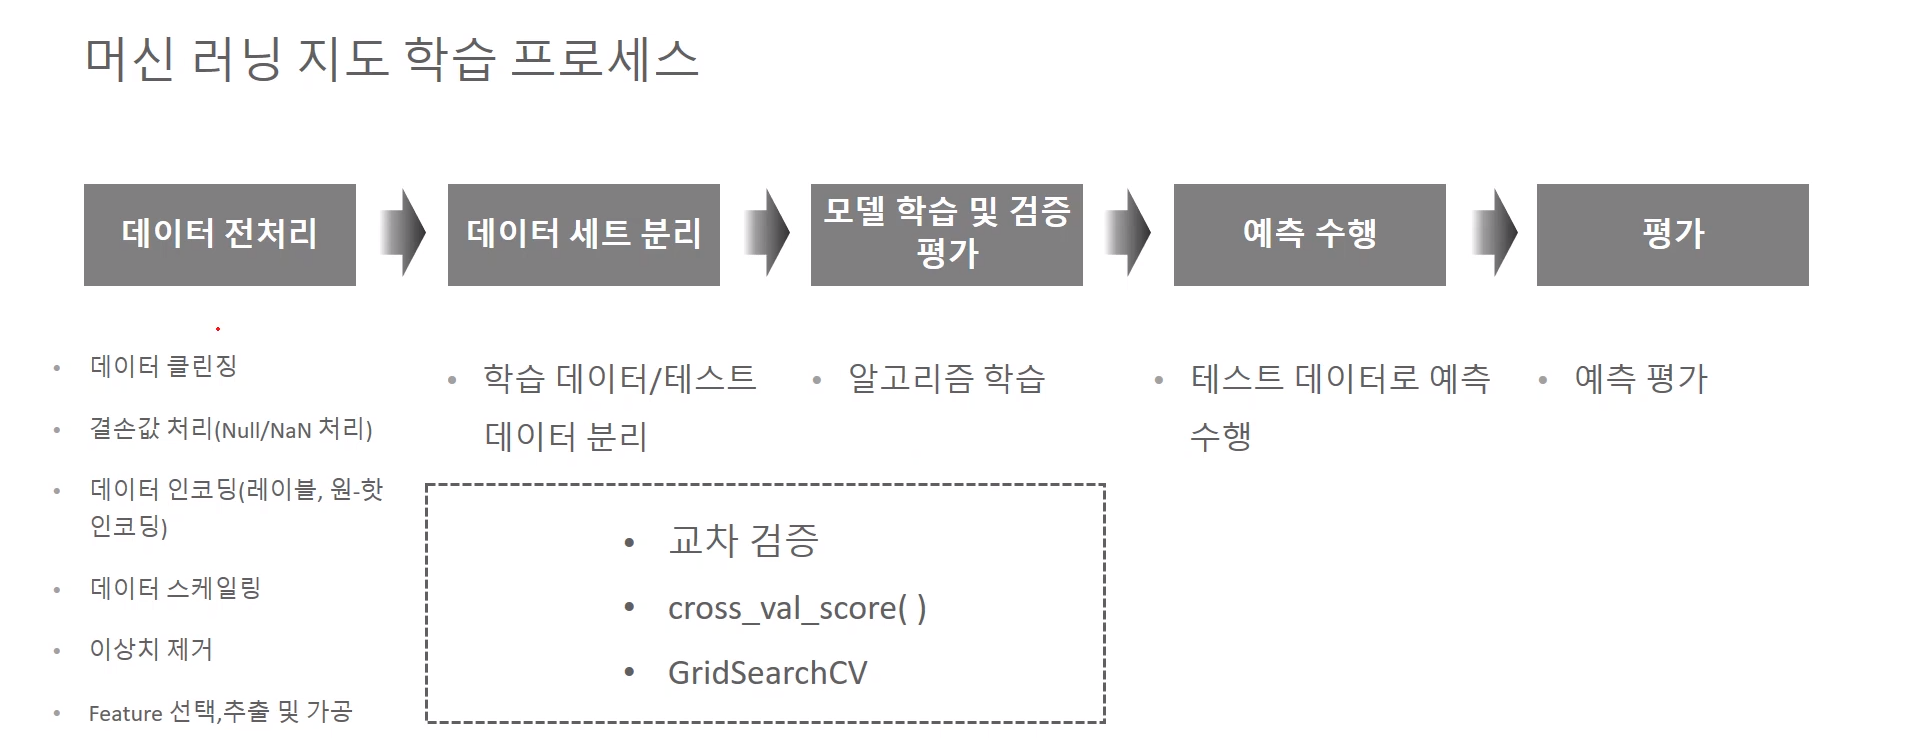

In [ ]:
## 3. feature 선택(selection), 추출(extration, PCA)
### 3-1 회귀
* 통계기반 statsmodels 통해 feature 통계적 특성 파악
    + 다중회귀에서 1. 전체모형, 2. 개별 독립변수에 대한 판단 3. 모형의 타당성 검증으로 
    + logit(logistic regression)에서는 개별 독립변수의 유의성 확인
* sklearn에서 제공되는 함수(REFCV, permutation_importance)

### 3-2 분류 엔트로피 기반
* 엔트로피 기반  entropy : 결정트리사용하는 모든 분류기(classifier) 모델 
    + 독립변수 <-> 종속변수간 엔트로피 직접 계산(mushroom)해 보거나
    + sklearn에서 제공되는 feature_importances_라는 parameter통해 feature별 모델에 대한 영향력 확인가능
    ===> 하지만 분류에서는 feature추출보다는 데이터전처리(이상치 제거 등)이 더 영향이 있음
* feature추출은 모델링결과에 따라 feature 중요도를 파악(많은 시간 소비)

train_test_split()는 간편하게 전체 데이터를 학습/테스트(또는 검증)용 데이터 세트로 분리하는 데 사용됩니다.  
cross_val_score()는 간편하게 교차검증 결과 평가 지표(정확도, 정밀도등)를 반환해 줍니다.  
GridSearchCV는 교차 검증을 통해 최적 하이퍼 파라미터를 찾아주는 역할을 합니다.  

피마 인디언 당뇨병 예측에서 0값을 평균값으로 대체 할 때  
mean_zero_features=diabetes_data[zero_features].mean()  
이렇게 한 것은 0도 평균을 구할때 같이 포함하는 코드가 아닌가요??  
0을 평균으로 대체한다면 0을 제외하고 평균을 구해야 할것같은데  
0을 제외하고 평균을 구하자면 아래와 같이 로직이 바뀌어야 할 것 같습니다.  

for feature in zero_features:  
    cond = diabetes_data[feature] != 0  
    print(feature, diabetes_data[cond][feature].mean())  
    diabetes_data[feature].replace(0, diabetes_data[cond][feature].mean())  

## PCA
PCA는 비지도 학습의 대표적인 알고리즘입니다. PCA는 아래와 같은 용도로 사용됩니다.  
1. 수십~ 수천개의 Feature 들이 있을 경우 이들의 PCA변환하여 Feature 갯수를 줄여주는 차원 축소 역할을 할 수 있습니다.   
2. 일반적으로 차원 축소는 많은 피처들의 갯수를 줄여주는 역할 외에도 이들 피처들의 주요 성분을 추출해 내는 역할을 합니다. PCA는 그래서 주성분 분석(Principal Component Analysis)로 불립니다.  
3. PCA는 컴퓨터 비전에서도 널리 활용됩니다. PCA 기반의 Face 분석 기법이 있습니다(공통 이미지 분석 기법)  
4. PCA는 적용되는 분야에 따라 차원 축소, 주성분 도출, 데이터 압축, 노이즈 제거(이미지등)등의 수행하는데 적용됩니다.   
5. 캐글과 같이 분류나 회귀에서 Feature engineering을 할때도 적용합니다. 보통 수백개 이상의 feature 들이 있을 때 이를 PCA로 압축하여 feature engineering을 한뒤에 다시 원본 데이터와 결합하여 추가적인 feature를 만들어서 예측 성능을 향상시키기도 합니다.  

In [ ]:
Bayesian optimization은 object 함수를 최대화(maximize) 또는 최소화(minimize) 할 수 있는 방향성으로 최적화 할 수 있습니다.  
정확도, ROC-AUC 같은 지표는 maximize 할 수 있어야 하고, RMSE 같은 지표는 minimize 해야 합니다  
(왜냐하면 rmse 오류에 대한 지표 이므로 최소화 해야 합니다). maximize형태의 지표를 사용하려면 maximize()를 minimize 형태의 지표를 사용하려면 minimize() 호출합니다.  
따라서 여기에 맞춰서 objective 함수가 만들어져야 합니다.  
사이킷런의 cross_val_score()에서 neg_mean_squared_error는 MSE에 -1을 곱한 값을 반환합니다. MSE는 양수인데 클수록 나쁜 지표입니다.  
사이킷런은 지표값이 큰 값은 좋은 지표로 일괄 처리하므로 이를 위해 MSE*-1 값을 제공합니다.   
maximize() 는 큰 값으로 유도하므로 neg_mean_squared_error로, 만일 -1*neg_mean_squared_error(즉 양수 오류) 이라면  
minimize()로 최적화 유도 해야 합니다.  

## 추천시스템

In [ ]:
유저가 좋은 평점을 준 영화에 대해서 해당 장르와 유사도가 높은 장르를 가지는 영화를 추천하는 것과 원하시는 방법이 크게 달라보이지 않습니다만,  
원하시는 것이 유저가 본 영화를 기반으로 어떤 baseline 기반의 선호 장르를 만드시는 건지요?  
이렇게 baseline 선호 장르를 vector나 text로 만들게 되면 비교 대상이 되는 장르들도 비슷하게 변경이 되어야 하는데  
이런 방식은 콘텐츠 기반 필터링으로는 적절해 보이지 않습니다.  
오히려 원하시는 방식은 이후 강의에서 소개 드리는 잠재요인 기반 협업 필터링에 더 가깝습니다.  
여기서 잠재 요인이 바로 원하시는 선호 장르가 될 수 있습니다.  
또는 유저가 본 영화를 기반으로 해당 평점이 높은(유저가 선호하는) 영화와 비슷한 영화를 추출하는 기법도 원하시는  
방법과 비슷해 보입니다만 선호 장르라는 공통 요소를 가져야 한다는 점에서는 차이가 있군요.  
(이후 강의에 나오는 아이템 기반 협업 필터링을 활용하시면 될것 같습니다만, 원하시는게 이거와는 조금 다르신것 같습니다.)  

In [ ]:
유사도 매트릭스를 도출할 때에 장르를 기반으로 도출하였는데, 혹시 2개 이상의 feature를 가지고 유사도를 도출할 수도 있나요??   
예를 들면, genre와 keyword를 모두 사용한다면, 두 feature를 따로 CounterVecotrize 한 이후에 merge하면 되는 건가요??  

. 말씀하신 대로 두 feature를 따로 feature vectorization 한 후에 merge하여 코사인 유사도 등으로 유사도 도출  
2. 두 feature를 모두 합쳐서 하나의 Text로 만든 다음에 feature vectorization 적용 후 유사도 도출  
3. 두 feature를 각각 feature vectorization하고 코사인 유사도를 별도로 도출한 후 genre 유사도 * 특정 가중치  
   + keyword 유사도에 다른 특정 가중치를 부여하여 전체 유사도 재 계산(genre 특정 가중치 + keyword 특정 가중치 = 1)

In [ ]:
행렬분해 강의를 듣던중 궁금한 점이 생겨 질문드립니다..  
원본행렬로 부터 R = P * Q.T ,  확률적 경사 하강법을 통해서  P와 Q라는 행렬로 분해가 되는것 이해가 됩니다. 하지만   
factor의 차원을 정하는것? factor의 수? 해당 슬라이드와 교재에서는 factor1, factor2,  2개의 잠재요인으로써  
P(4x2) Q(2x4) 행렬로 분해를 하였는데 당연히 저차원으로 분해를 하는 것이기에 M, N보단 작을 것이겠지만   
굳이 (K=2)2차원으로 행렬분해를 하는 이유가 있는지.. 실제로는 User의 수와 Item의 수가 굉장히 클텐데 이 경우에도 K의 값은   
증가 하나요? 따라서  원본행렬을 구하는 것이 목표이기에  적합한 K가 있는지 궁금합니다.    
딥러닝 모델 구성에서 hidden layer의 수나 Node의 수를 결정하는 것처럼 경험적인 것인지 궁금합니다..  

말씀하신 대로 K를 2로 잡은 것은 원본 행렬이 작아서 그런것입니다. User수와 Item 수가 큰 경우에는 K값을 증가시켜야 합니다.  
K값을 너무 크게 잡으면 오버피팅이 됩니다. 왜냐하면 K가 너무 크면 분해 행렬이 학습 데이터와 매우 비슷해지기 때문입니다.  
K값은 아이템(상품) 갯수보다 작아야 하며, 일반적인 추천 시스템에서 보통은 100을 설정합니다.  
하지만 K값은 테스트 하면서 찾아야 하는 하이퍼 파라미터 입니다. 말씀하신대로 경험적으로 선택해야 합니다.

In [ ]:
이 강의에서 다루셨던 추천 시스템에 대해 배우고 좀 더 심화적으로 협업과 컨텐츠기반  
필터링을 조합한 하이브리드 추천시스템에 대해 공부해보려고 하는데요..  
제가 몇일 간 Kaggle이나 towardscience같은 공간에서 검색해보았는데 뭔가 하이브리드 추천 시스템이 종류가  
너무나도 많아서 기본적으로 어떤 조합으로 먼저 연습해봐야하는지 모르겠습니다..
  그리고 혹시 추천시스템에 대한 심화내용으로 강의를 제작할 계획은 없으시겠죠..? 하하..  
    
하이브리드는 저도 고민이 되는 시스템입니다.

일반적으로 협업기반은 기존에 데이터가 없는 신규 아이템인 경우에는 적용하기가 어렵습니다(cold start 문제).  
때문에 신규 아이템의 경우는 컨텐츠 기반 필터링을 적용하고 어느정도 데이터가 축적되면 협업기반으로  
적용하는 방식으로 하이브리드 방식을 적용합니다.  
하지만 말씀하신 하이브리드는 위 같은 방식을 의미하는게 아니라 어느정도의 weight를 가지고 양쪽을  
적절하게 조합하는 방식을 의미하실 것입니다. 부끄럽게도 해당 방식은 저도 좋은 성능을 이끌어본 경험이 없습니다.  
다만 기반은 협업으로 하되, 특정 상품/특정 프로모션(이벤트)과 관련된 상품은 특정 고객 세그먼트나 또는  
전체 고객에게 (거의 광고 수준) 편향적으로 추천되도록 구성해본 적은 있습니다.  
이건 말 그대로 거의 끼워놓기 수준입니다. 하지만 일반적으로 많이들 사용합니다.   
요약 드리자면 아쉽게도 하이브리드를 통해 최적의 추천 성능으로 구성하는 방법은 저도 경험이 적습니다.  
다만 끼워놓기 수준으로 만드는 것은 어느정도 감각만 있으시다면 충분히 만드실 수 있을 것입니다.    

In [ ]:
유사도 매트릭스 도출에서 궁금증이 생겨서 질문합니다!  
유사도 매트릭스를 도출할 때에 장르를 기반으로 도출하였는데, 혹시 2개 이상의 feature를 가지고 유사도를 도출할 수도 있나요??   
 예를 들면, genre와 keyword를 모두 사용한다면, 두 feature를 따로 CounterVecotrize 한 이후에 merge하면 되는 건가요??  
    
방법은 말씀하신 사항을 포함해서 아래와 같은 방법을 적용할 수 있을 것 같습니다.  
1. 말씀하신 대로 두 feature를 따로 feature vectorization 한 후에 merge하여 코사인 유사도 등으로 유사도 도출  
2. 두 feature를 모두 합쳐서 하나의 Text로 만든 다음에 feature vectorization 적용 후 유사도 도출  
3. 두 feature를 각각 feature vectorization하고 코사인 유사도를 별도로 도출한 후 genre 유사도 * 특정 가중치 + keyword 유사도에  
다른 특정 가중치를 부여하여 전체 유사도 재 계산(genre 특정 가중치 + keyword 특정 가중치 = 1)

### 기타

In [ ]:
make_blobs는 주로 centroid 데이터를 만드는데 사용됩니다.  
여러가지 유형을 가진 데이터세트를 만드는데는 sklearn.datasets내의 모듈들이 사용됩니다.  
가령 make_circles는 원형으로 분포된 데이터 세트를 만듭니다.  
 make_classifications는 centroid이지만 classification까지 포함된 데이터 세트를 만듭니다.  
그외에도 달 형태로 분포된 데이터 세트를 만드는 make_moons 도 있습니다.  
보다 다양한 데이터 세트는 https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets 에서 sample generator 부분을 참조해 주시기 바랍니다.    

In [ ]:
!pip install graphviz

### SGD

In [ ]:
SGD에서 수행 시 반복횟수 이터레이션 n_epochs 이 정확히 무엇을 말하나요?  
기억이 가물가물해서 그런데 혹시 디폴트 값이 20이면 전체데이털르 최대 20번까지 돌면서 학습하는 것인가요??  
혹시 만약 맞다면 같은 데이터를 계속학습한다면 어떤 장점이 있어서인가요?   

이터레이션은 말씀하신 대로 SGD를 수행할 때 반복하는 횟수를 의미합니다.  
SGD는 일반적으로  (무작정) 예측 오류값이 작아지는 방향성으로 최적 해를 찾기 위해서 수행합니다.  
실제값과 예측값의 차이가 충분히 작아질 수 있도록 행렬 분해 된 P행렬과  Q 행렬을 유도하기 위해서 사용됩니다.  
이때 예측 오류값이 작아지는 방향성인 최적해는 구하려는 목적별로 다릅니다(가령 딥러닝의 SGD나 행렬 분해의 SGD).  
여기서는  행렬 분해를 위한 SGD식에서 이터레이션 횟수만큼 전체 데이터에 대해 최적 최소 예측 오류식의  
Weight값을 계속 update하면서  최적 P와 Q를 유도해 갑니다.  
이터레이션을 많이 할 수록 더 많은 weight update를 수행하므로 이론적으로는 
충분히 작은 예측 오류에 도달할 수 있는 장점이 있습니다(하지만 반드시 그렇지는 않습니다)

## 비군집 k means

In [ ]:
K-means 중심점을 클러스터의 개수와 같이 생성하고 시작하는데 K-means 알고리즘을 진행하는데  
맨 처음에 중심점은 어떤 기준으로 생성되는 건가요?


최초에 중심점을 생성하는 방법은 random과 k-means++가 있으며 default로 k-means++입니다.  
KMeans(init='k-means++') 와 같이 설정합니다.  
random은 말 그대로 random하게 중심점을 생성합니다(원래 kmeans는 random하게 중심점을 생성합니다)  
kmeans++는 random  중심점으로 초기화 시 문제들을 해결하기 위해 도입되었습니다.  
이게 설명이 길어서 아래 URL의 내용을 참조 부탁드립니다.  
https://eunsukim.me/posts/understanding-K-Means++  
요약하자면  
  첫 번째 centroid를 임의로 지정합니다.  
  남은 각 데이터 포인트에 대해서 가장 가까운 centroids와의 거리를 계산합니다.  
  다음 centroid는 각 데이터 포인트와 가장 가까운 centroid와의 거리에 비례하는 확률에 따라 지정됩니다.  
      이로 인해 다음 centroid가 이미 지정된 centroid에 근접하게 되는 것을 예방할 수 있습니다.
  2 ~ 3 단계를 k 개의 centroids를 모두 지정할 때 까지 반복합니다.  

## fit_transform()

In [ ]:
학습 모델이 1682개의 feature들로 되어 있는 feature vector 데이터 세트로 학습 되어 있기 때문에 1270개의 feature 들로 되어 있는 데이터 세트로 예측 할 수 없습니다.  
아래와 같이 vectorize2.fit_transform(gogl2020_feat)으로 되어 있는 부분을 vectorize.transform(gogl2020_feat)로 바꿔 주십시요.  변경 후 glgo2020_features.shape는  
19674, 1270 이 아니라 19674, 1682 가 되는 지 확인해 주십시요.  
gogl2020_features = vectorizer2.fit_transform(gogl2020_feat)  
gogl2020_features.shape  
vectorizer2.fit_transform(gogl2020_feat)을 호출하면 fit()하고 transform()하게 되므로 gogl2020_feat 데이터 세트로  
다시 feature vector 데이터 세트를 만들게 됩니다. 이 경우 feature 갯수가 처음 학습된 feature vector와 맞지 않을 수 있습니다.  
때문에 학습시에 사용된 feature vectorizer를 이용하여 테스트를 수행하려면 fit_transform()이 아니라 transform()만 호출하여  
기존 feature 갯수대로 변환 시켜 줄수 있어야 합니다.  

In [ ]:
다름이 아니라 수업을 들으며, 베이지안 최적화 방법을 통한 하이퍼 파라미터 튜닝 과정에서 헷갈리는 부분이 있어서 질문 올리게 되었습니다.  
선생님이 예시로 보여주신 코드처럼 iteration을 수행할 때마다, 하이퍼 파라미터를 입력받아 학습하고 rmse 값을 반환하는 함수를 생성해주고자 합니다.  
그런데 랜덤포레스트 모델에서 베이지안 최적화(cross validation 수행)을 하고자 할 때, 만약 평가 지표를 RMSE를 사용하고자 한다면 아래와 같이 코드를 작성하면 되는 것인가요?  
구글링을 좀 해보니 함수 반환 값을 "return -mean_rmse"와 같이 뒤에 -1 을 곱해서 rmse 값을 최소화 해주어야 한다는 글을 몇 개 보았는데, 어떤 것이 맞는 건지 헷갈리네요...  
즉, return 값에 "mean_rmse"를 해주는 것이 맞는지, 아니면 "-mean_rmse"를 해주는 것이 맞는지 궁금합니다  
rf_bayes_params = {
    'max_depth': (6, 12),
    'min_samples_leaf': (8, 18),
    'min_samples_split': (8, 20)
}

def rf_eval(max_depth, min_samples_leaf, min_samples_split):
    params = {
        # n_estimators 값은 100으로 고정
        'n_estimators': 100,
        # 호출 시, 실수형 값들이 들어오므로 정수형 하이퍼 파라미터는 정수형으로 변경해줘야 함
        'max_depth': int(round(max_depth)),
        'min_samples_leaf': int(round(min_samples_leaf)),
        'min_samples_split': int(round(min_samples_split))
    }
    
    rf = RandomForestRegressor(**params, n_jobs = -1, random_state = 1021)
    
    # Cross Validation
    neg_mse_scores = cross_val_score(rf, X_features, y_target, # CV를 수행할 것이므로, 전체 학습 데이터 셋을 사용
                                     scoring = 'neg_mean_squared_error',
                                     cv = 3)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    mean_rmse = np.mean(rmse_scores)
    
    return mean_rmse

rf_bayes = BayesianOptimization(f = rf_eval, pbounds = rf_bayes_params, random_state = 1021)
rf_bayes.maximize(init_points = 5, n_iter = 25)

rf_bayes.res

< 답변 >
Bayesian optimization은 object 함수를 최대화(maximize) 또는 최소화(minimize) 할 수 있는 방향성으로 최적화 할 수 있습니다.  
정확도, ROC-AUC 같은 지표는 maximize 할 수 있어야 하고, RMSE 같은 지표는 minimize 해야 합니다(왜냐하면 rmse 오류에 대한 지표 이므로 최소화 해야 합니다). maximize형태의 지표를 사용하려면  
maximize()를 minimize 형태의 지표를 사용하려면 minimize() 호출합니다. 따라서 여기에 맞춰서 objective 함수가 만들어져야 합니다.  
사이킷런의 cross_val_score()에서 neg_mean_squared_error는 MSE에 -1을 곱한 값을 반환합니다. MSE는 양수인데 클수록 나쁜 지표입니다.  
사이킷런은 지표값이 큰 값은 좋은 지표로 일괄 처리하므로 이를 위해 MSE*-1 값을 제공합니다.   
maximize() 는 큰 값으로 유도하므로 neg_mean_squared_error로,  
만일 -1*neg_mean_squared_error(즉 양수 오류) 이라면 minimize()로 최적화 유도 해야 합니다.  

## adaboost 가중치 update

In [ ]:
Adaboost는 가중치 update식이 다릅니다  
이게 수식이 좀 있어서 제가 게시판에 수식을 쓰기가 어렵군요.  
아래 이미지를 참조 부탁드립니다.  
 (수식이라 알파벳 표현이 정확하게 안되는점 양해 부탁드립니다. 알파나 첨자 표시를 게시판에서 적을 수가 없습니다.)  
먼저 알파m 은 sample weight total error로 구합니다.  
그런 다음 약한 학습기의 iteration시 마다 아래와 같이 가중치를 update합니다.  
오류 데이터의 경우는 아래와 같이  예측이 맞은 데이터는 아래와 같이 적용합니다.  
전체 알고리즘에 대한 설명을 게시판으로 설명드리기에는 너무 무리일것 같아서 아래 링크를 참조 부탁드립니다.  
https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-14-AdaBoost  
    